# Прогноз продаж в интернет-магазине видеоигр
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Предобработка

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

# Options for pandas
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 300

 

In [ ]:
df = pd.read_csv('games.csv')

In [50]:
df.head()
df.info()
df.describe()
df.duplicated().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


0

В некоторых столбцах есть пропуски, явных дубликатов нет

In [51]:
# Приведение к нижнему регистру
df.columns = df.columns.map(lambda x: x.lower())

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбце `name` 2 пропуска, которые можно удалить

In [52]:
df = df[~df['name'].isna()]


In [53]:
df['name'] = df['name'].map(lambda x: x.strip())


Все платформы и жанры

In [54]:
df['platform'].value_counts()

df['genre'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [55]:
df[df[['name', 'platform']].duplicated(keep=False)].sort_values('name')

df[df[['name', 'platform']].duplicated(keep = 'first')].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+


Стоит удалить вторые записи среди дубликатов, т. к. в них меньше корректных данных 

In [56]:
df.drop_duplicates(subset = ['name', 'platform'], keep='first', inplace = True)


Некоторые пропуски в столбцах `year_of_release` можно заменить модальным значением для каждой игры, потому что зачастую игры выходят в один год на всех платформах. Пропуски скорее всего связаны с отсутствием этих данных еще при занесении в БД 

In [57]:
df['year_of_release'] = df.groupby('name')['year_of_release']\
    .apply(lambda x: x.fillna(x.mode(dropna = False).iloc[0]))

In [58]:
df['user_score'].value_counts(dropna = False, normalize=True)

NaN    0.400922
tbd    0.145072
7.8    0.019391
8      0.017356
8.2    0.016877
         ...   
0.2    0.000120
1.9    0.000120
0.3    0.000120
0      0.000060
9.7    0.000060
Name: user_score, Length: 97, dtype: float64

Т. к. около 15% значений в `user_score` не определны (tbd), то их можно заменить на NaN 

In [59]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Может быть tbd появляется, когда оценку ставит неавторизованный пользователь, поэтому она не учитывается. А может это сбой

Теперь значения в `year_of_release` можно привести к int, а в `user_score` – к float

In [60]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype('float64')


Для пропусков в столбцах `critic_score` и `user_score` можно использовать среднее значение среди всех известных оценок игры, `rating` также можно заполнить уже известным рейтингом с других платформ

In [61]:
df[['critic_score', 'user_score']] = df.groupby('name')[['critic_score', 'user_score']].transform(lambda x: x.fillna(x.mean()))
df['rating'] = df.groupby('name')['rating'].transform(lambda x: x.ffill().bfill())


In [62]:
df['critic_score'] = df['critic_score'].round(0)
df['user_score'] = df['user_score'].round(1)

Суммарные продажи во всех регионах

In [63]:
df = df.assign(total_sales = df.iloc[:, 4:8].sum(axis=1))  

In [64]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16536 non-null  Int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     9094 non-null   float64
 9   user_score       8685 non-null   float64
 10  rating           10382 non-null  object 
 11  total_sales      16709 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# EDA

In [65]:
rc={'figure.figsize':(16, 8),
    'axes.titlesize': 24,
    'axes.labelsize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.autolayout': False,
    'axes.grid': False
    }
sns.set_theme(style = 'white', rc = rc)

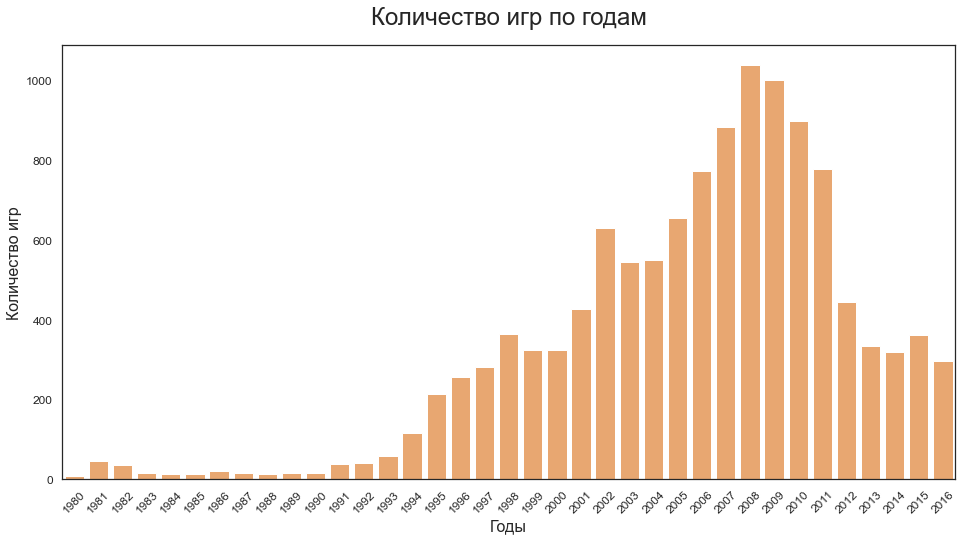

In [66]:
sns.barplot(x = df.groupby('year_of_release', as_index=False)['name'].agg('nunique')['year_of_release'],
            y = df.groupby('year_of_release', as_index=False)['name'].agg('nunique')['name'], 
            color = sns.color_palette('Spectral')[1])

plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам', pad=20)

plt.xticks(rotation=45)
plt.show();

Активно игры начали выходить с 1991 года, пик был в 2008 - 2009 годах, после чего количество выпускаемых игр начало снижаться. Вряд ли игры до 1991 года сильно повлияют на прогноз кампании 2017 года, а наибольшее влияние имеют игры, выпущенные за последние 5-8 лет

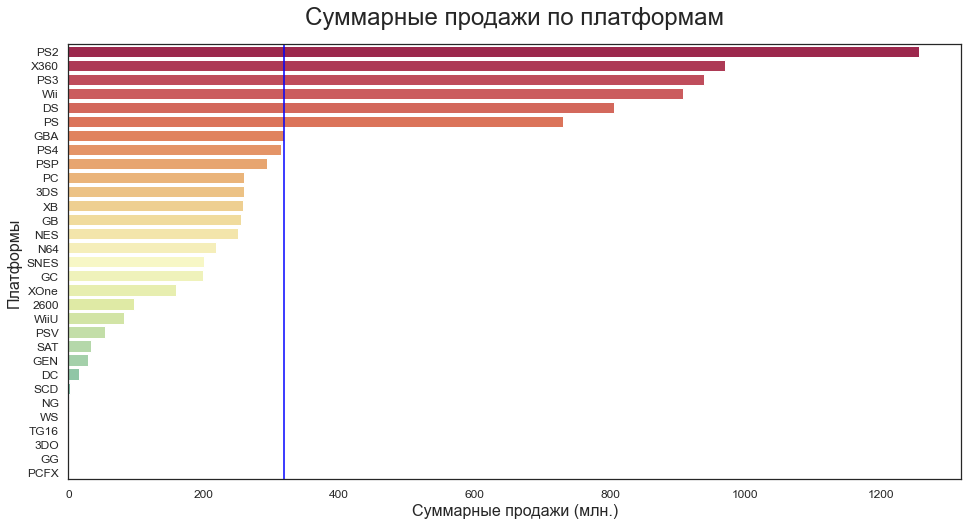

In [67]:
sns.barplot(y = df.groupby('platform', as_index=False)['total_sales'].sum().\
                sort_values('total_sales', ascending=False)['platform'],
            x = df.groupby('platform', as_index=False)['total_sales'].sum().\
                sort_values('total_sales', ascending=False)['total_sales'], palette = 'Spectral')

plt.xlabel('Суммарные продажи (млн.)')
plt.ylabel('Платформы')
plt.title('Суммарные продажи по платформам', pad=20)
plt.axvline(x = 318, color = 'blue')
plt.show();

Топ 6 платформ по продажам

In [68]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).to_frame().reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,970.17
2,PS3,939.16
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [69]:
top_list = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)\
    .to_frame().reset_index()['platform'].to_list()
top_sales_df = df[df['platform'].isin(top_list)]

top_sales_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


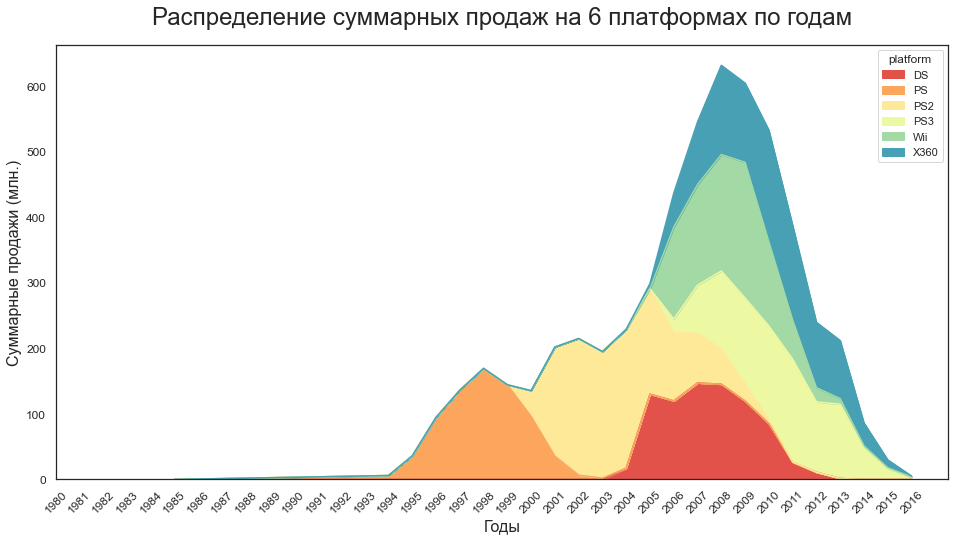

In [70]:
top_sales_df.pivot_table(index = 'year_of_release',\
                         columns = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()\
            .plot(x = 'year_of_release', kind = 'area', stacked = True, color = sns.set_palette('Spectral'))

plt.xlabel('Годы')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Распределение суммарных продаж на 6 платформах по годам', pad=20)
plt.xticks(sorted(np.array(df['year_of_release'].unique()[:len(df['year_of_release'].unique())-1]).tolist()),\
           rotation=45)

plt.show();

Можно заметить, что средний жизененный цикл платформ 9 - 11 лет

Актуальным можно считать период с момента появления последнего поколения консолей на рынке, т. е. с 2013 года по 2016

In [71]:
act_df = df[df['year_of_release'].isin([i for i in range(2013, 2017)])]

act_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


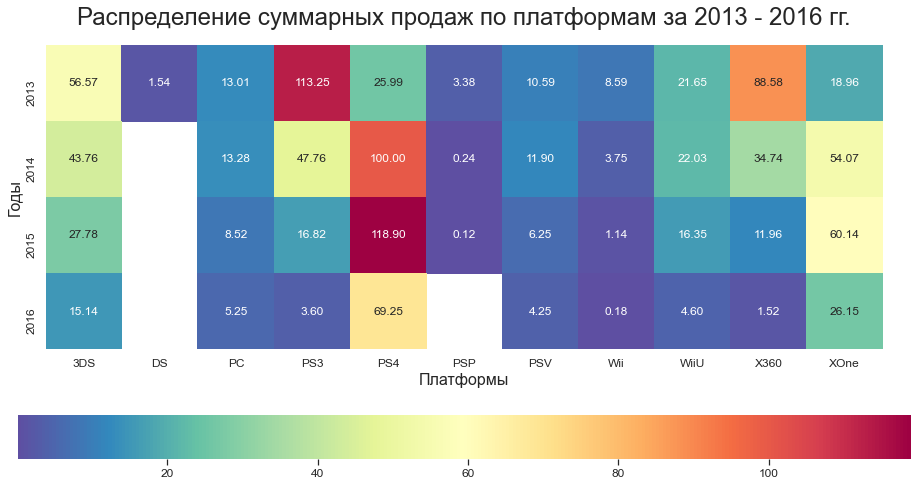

In [72]:
temp = act_df.pivot_table(index = 'year_of_release',\
            columns = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()

temp = temp.rename_axis(None, axis=1).reset_index(drop=True).set_index('year_of_release')

sns.heatmap(temp, annot = True, fmt = '.2f', cmap='Spectral_r', square = True,\
            cbar_kws={"orientation": "horizontal"})
plt.xlabel('Платформы')
plt.ylabel('Годы')
plt.title('Распределение суммарных продаж по платформам за 2013 - 2016 гг.', pad=20)

plt.show();

- Из всех платформ только у PS4 и Xbox One продажи растут 
- Также на PS4 самые высокие продажи за каждый год (кроме 2013)
- В 2016 году на всех платформах видно снижение продаж
- У DS продажи закончились в 2013, у PSP - в 2015

Наиболее потенциально прибыльные платформы - это PS4 и Xbox One

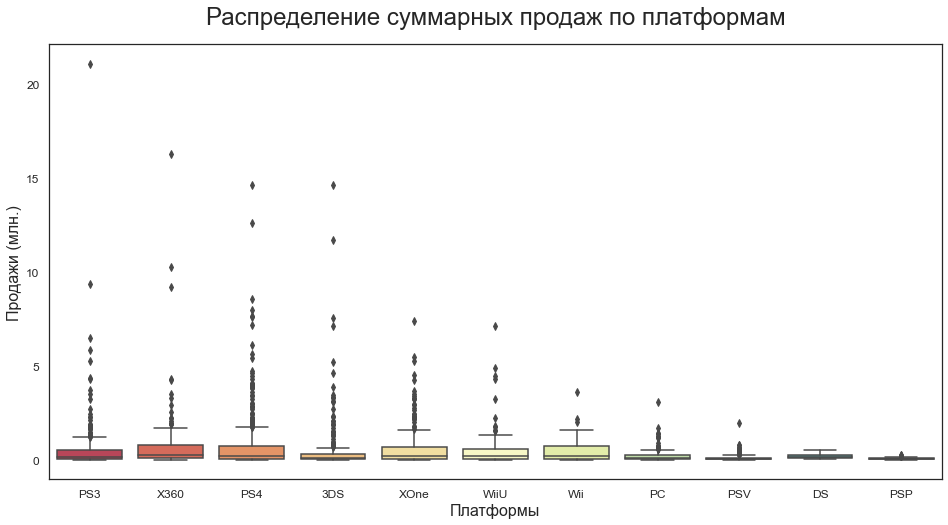

In [73]:
sns.boxplot(x = act_df['platform'], y = act_df['total_sales'], palette = 'Spectral')
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.)')
plt.title('Распределение суммарных продаж по платформам', pad=20)
plt.show();

Видно, что наибольшие продажи были на PS3, PS4, Xbox 360 и 3DS, на этих же платформах очень много выбросов

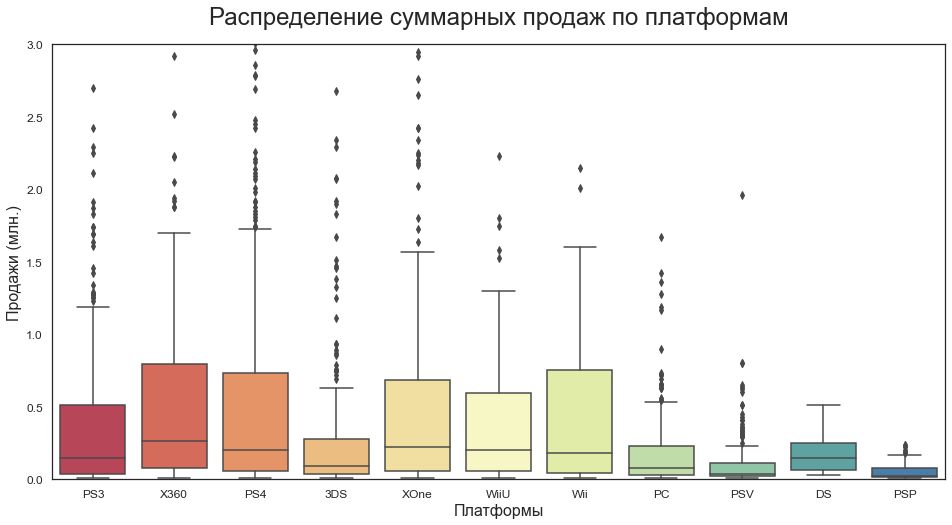

In [74]:
sns.boxplot(x = act_df['platform'], y = act_df['total_sales'], palette = 'Spectral')

plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.)')
plt.title('Распределение суммарных продаж по платформам', pad=20)
plt.ylim(0, 3)
plt.show();

- Продажи 75% игр на каждой платформе не превышают 1 млн. копий
- Медианное значение не превышает 300 тыс. копий

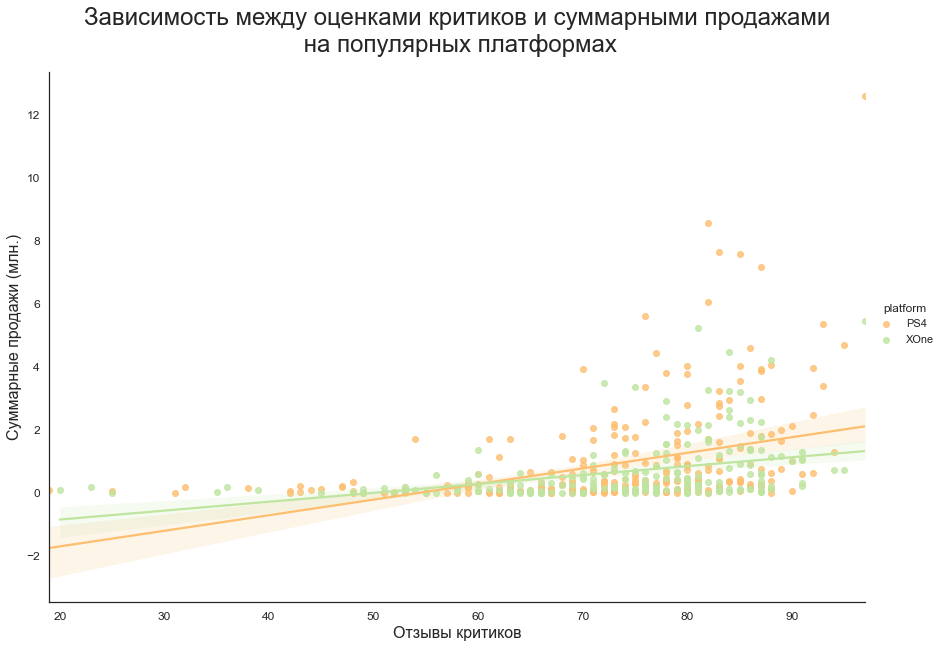

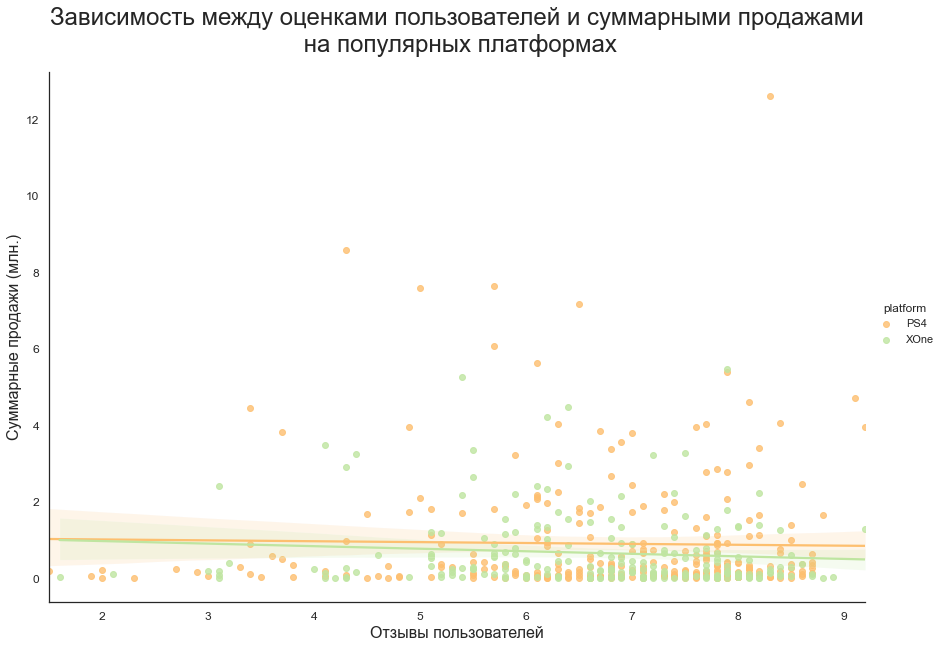

In [75]:
sns.lmplot(data = act_df[act_df['platform'].isin(['PS4', 'XOne'])],
           x = 'critic_score', y = 'total_sales', height = 8, aspect = 1.5,
           hue = 'platform', palette = 'Spectral'
          )
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Зависимость между оценками критиков и суммарными продажами\n на популярных платформах', pad=20)
plt.show();



sns.lmplot(data = act_df[act_df['platform'].isin(['PS4', 'XOne'])],
           x = 'user_score', y = 'total_sales', height = 8, aspect = 1.5,
           hue = 'platform', palette = 'Spectral'
          )
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Зависимость между оценками пользователей и суммарными продажами\n на популярных платформах', pad=20)
plt.show();

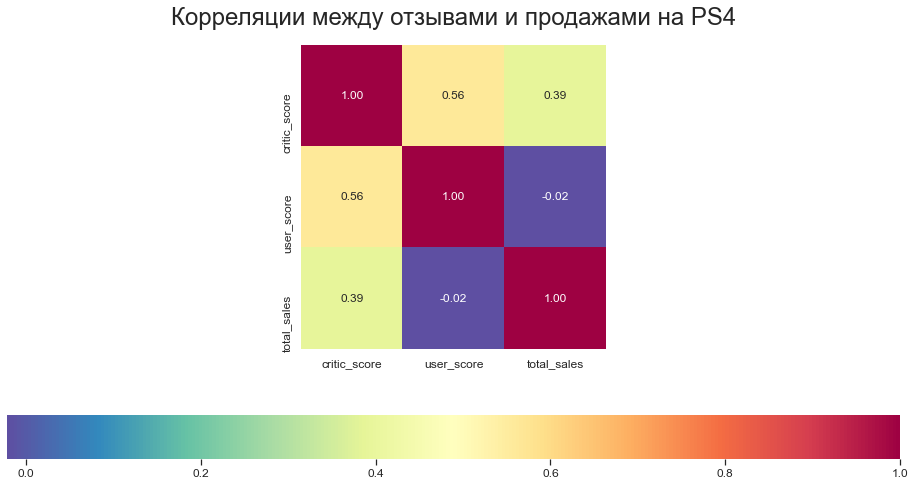

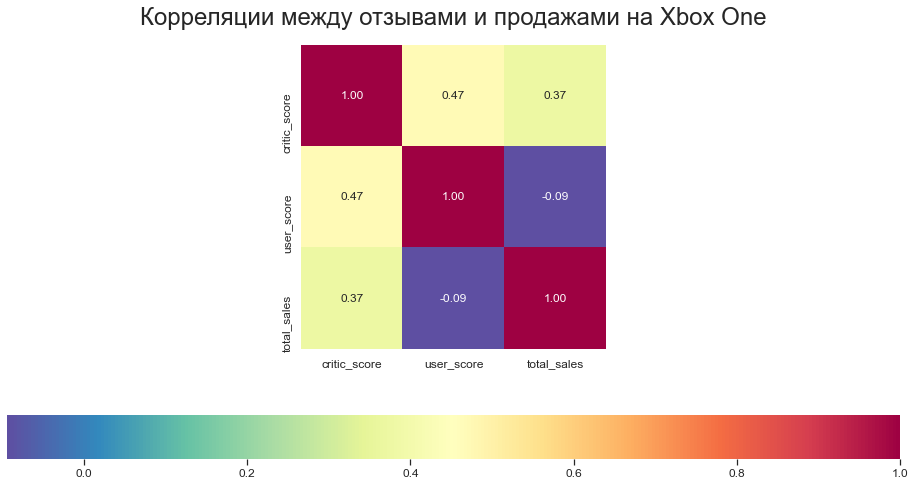

In [76]:
sns.heatmap(act_df[act_df['platform'].isin(['PS4'])][['critic_score', 'user_score', 'total_sales']]\
            .corr(), annot = True, fmt = '.2f', cmap='Spectral_r', square = True,
            cbar_kws={"orientation": "horizontal"})
plt.title('Корреляции между отзывами и продажами на PS4', pad=20)
plt.show();

sns.heatmap(act_df[act_df['platform'].isin(['XOne'])][['critic_score', 'user_score', 'total_sales']]\
            .corr(), annot = True, fmt = '.2f', cmap='Spectral_r', square = True,
            cbar_kws={"orientation": "horizontal"})

plt.title('Корреляции между отзывами и продажами на Xbox One', pad=20)
plt.show();

- На графиках видно, что между оценками пользователей и продажами нет никакой связи
- Между оценками критиков и продажами связь есть, но слабая
- Показатели корреляции продаж на Xbox One чуть хуже, чем на PS4 

In [77]:
ll1 = []
ll2 = []
for i in act_df['platform'].unique().tolist():
    t1 = act_df[act_df['platform'].isin([i])][['critic_score', 'user_score', 'total_sales']]\
    .corr()['critic_score']['total_sales']
    t2 = act_df[act_df['platform'].isin([i])][['critic_score', 'user_score', 'total_sales']]\
    .corr()['user_score']['total_sales']
    ll1.append([i, 'critic_score', t1])
    ll2.append([i, 'user_score', t2])

corr_df = pd.concat([pd.DataFrame(ll1), pd.DataFrame(ll2)]).sort_values([0, 1])\
          .reset_index().drop('index', axis = 1)
corr_df

,0,1,2
0,3DS,critic_score,0.343746
1,3DS,user_score,0.287010
2,DS,critic_score,0.589309
3,DS,user_score,0.038967
4,PC,critic_score,0.198900
5,PC,user_score,-0.102861
6,PS3,critic_score,0.297005
7,PS3,user_score,0.012849
8,PS4,critic_score,0.391644
9,PS4,user_score,-0.021589


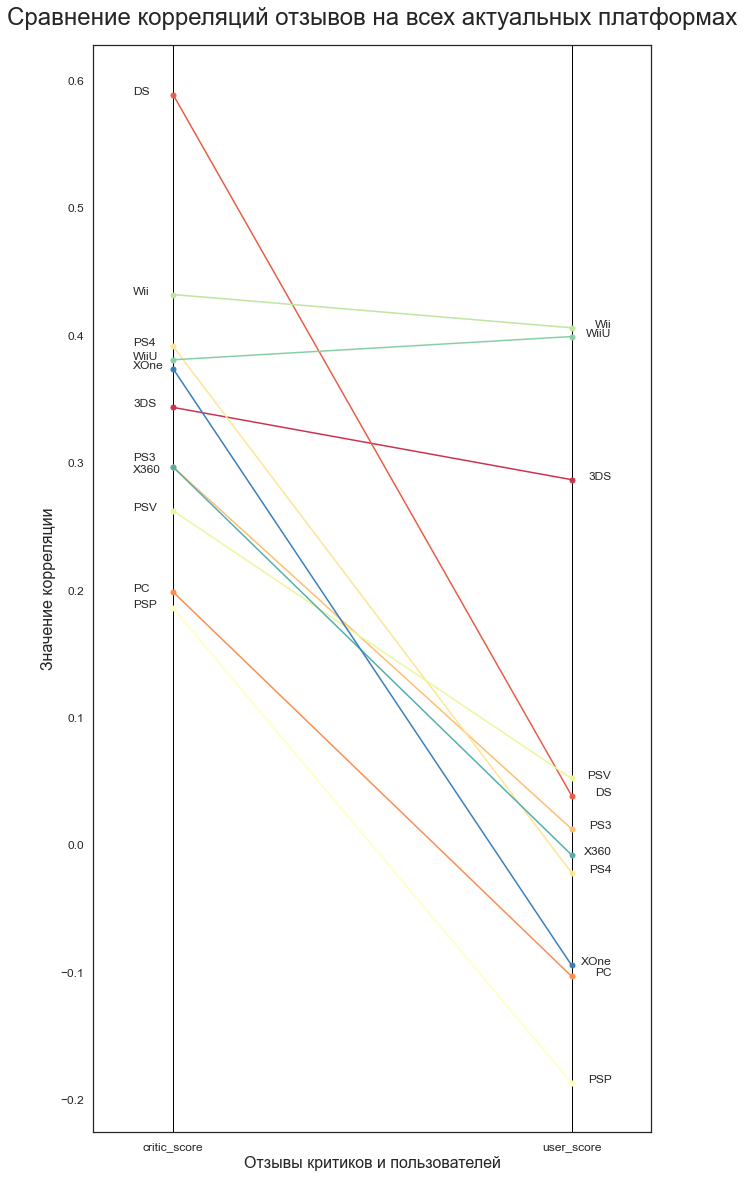

In [78]:
fig, ax = plt.subplots(1, figsize=(10, 20))
plt.axvline(0, c = 'black', lw = 1)
plt.axvline(1, c = 'black', lw = 1)

for num, i in enumerate(corr_df[0].unique().tolist()):
    temp = corr_df[corr_df[0] == i]
    color = sns.color_palette('Spectral', n_colors = 11)[num]
    plt.plot(temp[1], temp[2], marker='o', markersize=5, c = color)
    
    if i == 'PS3':
        plt.text(-0.1, temp[2].values[0]+0.005, i)
        plt.text(1.1, temp[2].values[1], i, ha='right')
    elif i == 'X360':
        plt.text(-0.1, temp[2].values[0]-0.005, i)
        plt.text(1.1, temp[2].values[1], i, ha='right')
    else:
        plt.text(-0.1, temp[2].values[0], i)
        plt.text(1.1, temp[2].values[1], i, ha='right')
    
plt.xlim(-0.2, 1.2)

plt.xlabel('Отзывы критиков и пользователей')
plt.ylabel('Значение корреляции')
plt.title('Сравнение корреляций отзывов на всех актуальных платформах', pad=20)
plt.show();

- На всех платформах связи между оценками и продажами либо нет, либо она очень слабая (менее 0.5)
- Видно, что пользовательские оценки влияют меньше, чем оценки критиков
- Самая сильная корреляция наблюдается у DS ~0.59

Таким образом оценки пользователей и критиков скорее всего не влияют на продажи

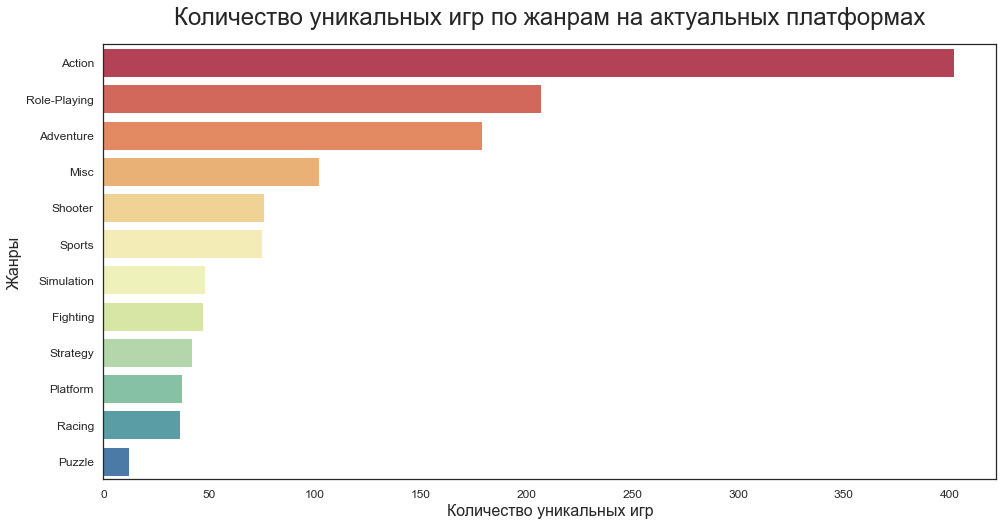

In [79]:
top_genres = act_df.groupby('genre')['name'].agg('nunique').sort_values(ascending = False).reset_index()
sns.barplot(y = top_genres['genre'], x = top_genres['name'], palette = 'Spectral')

plt.xlabel('Количество уникальных игр')
plt.ylabel('Жанры')
plt.title('Количество уникальных игр по жанрам на актуальных платформах', pad=20)

plt.show();

- Самый популярный жанр - `Action`, затем идут `Role-Playing` и `Adventure`
- В жанре Puzzle меньше всего игр 

In [80]:
top_genres = act_df.groupby('genre').agg({'total_sales': 'sum', 'name': 'count'})\
             .sort_values('total_sales', ascending = False).reset_index()
top_genres

,genre,total_sales,name
0,Action,322.50,769
1,Shooter,232.98,187
2,Sports,150.65,214
3,Role-Playing,145.89,292
4,Misc,63.06,156
5,Platform,42.63,74
6,Racing,39.89,85
7,Fighting,35.31,80
8,Adventure,23.64,245
9,Simulation,21.76,62


Так как суммарные продажи пропорциональны количеству выпущенных игр, то стоит найти средние продажи для каждого жанра

In [81]:
top_genres = top_genres.assign(avg_sales = top_genres['total_sales'] / top_genres['name'])\
             .sort_values('avg_sales', ascending = False).reset_index()

top_genres

,index,genre,total_sales,name,avg_sales
0,1,Shooter,232.98,187,1.245882
1,2,Sports,150.65,214,0.703972
2,5,Platform,42.63,74,0.576081
3,3,Role-Playing,145.89,292,0.499623
4,6,Racing,39.89,85,0.469294
5,7,Fighting,35.31,80,0.441375
6,0,Action,322.50,769,0.419376
7,4,Misc,63.06,156,0.404231
8,9,Simulation,21.76,62,0.350968
9,11,Puzzle,3.17,17,0.186471


- С учетом средних продаж можно заметить, что `Shooter`, `Sport` и `Role-Playing` хорошо продаются в любом случае
- `Action` спустился с 1 места по суммарным прожажам на 7 место по средним продажам
- `Puzzle` и `Strategy` стабильно плохо продаются

# Портреты пользователей каждого региона

In [82]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print(i)
    a = act_df.groupby('platform')[i].sum().sort_values(ascending = False).reset_index().head()
    b = act_df.groupby('genre')[i].sum().sort_values(ascending = False).reset_index().head()
    c = act_df.groupby('rating', dropna=False)[i].sum().sort_values(ascending = False).reset_index()
    pd.merge(pd.merge(a, b, left_index=True, right_index=True), c, left_index=True, right_index=True)
    print()

na_sales


,platform,na_sales_x,genre,na_sales_y,rating,na_sales
0,PS4,108.74,Action,126.13,M,175.18
1,XOne,93.12,Shooter,109.74,E,81.68
2,X360,81.66,Sports,65.27,NaN,72.54
3,PS3,63.50,Role-Playing,46.40,E10+,56.41
4,3DS,38.20,Misc,27.49,T,51.98



eu_sales


,platform,eu_sales_x,genre,eu_sales_y,rating,eu_sales
0,PS4,141.09,Action,118.61,M,157.15
1,PS3,67.81,Shooter,87.86,E,85.47
2,XOne,51.59,Sports,60.52,NaN,61.19
3,X360,42.52,Role-Playing,36.97,E10+,45.22
4,3DS,30.96,Racing,20.19,T,43.68



jp_sales


,platform,jp_sales_x,genre,jp_sales_y,rating,jp_sales
0,3DS,67.81,Role-Playing,51.04,NaN,80.82
1,PS3,23.35,Action,40.49,T,22.84
2,PSV,18.59,Misc,9.44,E,15.98
3,PS4,15.96,Fighting,7.65,M,15.11
4,WiiU,10.88,Shooter,6.61,E10+,6.27


- В Америке и Европе одни и те же платформы в топ-5, в Японии только японские, вместо Xbox Wii
- 3DS на западе на последнем месте, а в Японии на первом
- В Европе лидирует PS4 по продажам, на других платформах продаж в 2 и более раз меньше
- В Америке продажи по платформам более равномерные
- В Японии продаж на всех платформах заметно меньше
- Жанры практически везде одинаковые, только Европа отличается `Racing`, а Япония `Fighting`
- В Америке и Европе продажи по жанарам почти одинаковые
- В Японии снова продаж меньше
- Топ рейтинов в Америке и Европе один и тот же, а продажи в Америке чуть выше
- «Для взрослых» - самый популярный рейтинг на западе, а Японии он только на 4 месте
- В Японии больше всего рейтинга, о котором нет данных, либо это EC (дети от 3 лет), либо это AO (только для взрослых). Причем для этого рейтинга продаж больше, чем для всех остальных вместе взятых, а также продаж больше, чем у любой отдельной платформы и любого жанра

На западе игры больше ориентированы на новые поколения консолей в жанрах `Action`, `Shooter` и `Sports` для людей страше 17.
В Японии игры больше ориентированы на японские платформы в жанрах `Role-Playing`, `Action` и `Misc` для детей от 13 и от 6 лет.

ЦА В Америке и Европе - это платежеспособные молодые люди, покупающие игры с высоким возрастным рейтингом, а в Японии скорее всего это дети, либо люди, играющие в игры с более низкими возрастными рейтингами, поэтому скорее всего рейтинг влияет на продажи

# Проверка гипотез

## Гипотеза о равенстве средних пользовательских рейтингов платформ

Так как 0-я гипотеза - это гипотеза об отсутствии различий, а альтернативная - это гипотеза о значимости различий, то их можно сформулировать так:

- H0: средние пользовательские рейтинги платформ Xbox One и PC не отличаются;
- H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [83]:
alpha = 0.05 # критический уровень статистической значимости для всех тестов

In [84]:
XOne_score = act_df.query('platform == "XOne"')['user_score'].dropna()
PC_score = act_df.query('platform == "PC"')['user_score'].dropna()

XOne_score.mean()
PC_score.mean()

len(XOne_score)
len(PC_score)


6.604368932038832

6.263749999999998

206

160

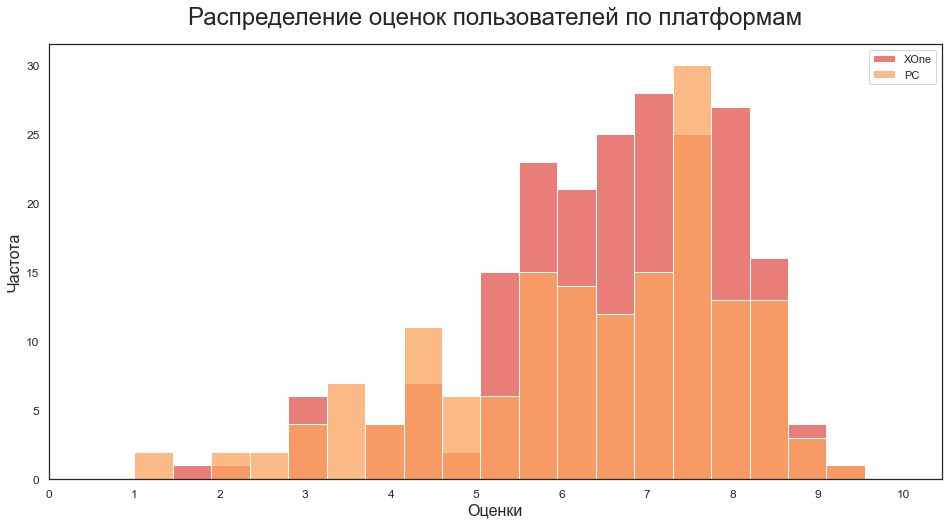

In [85]:
sns.histplot(XOne_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[0], label = 'XOne')
sns.histplot(PC_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[1], label = 'PC')

plt.xlabel('Оценки')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей по платформам', pad=20)
plt.legend()
plt.xticks(np.arange(0,11))

plt.show();

Так как размеры выборок не равны, можно применить метод оверсэмплинга

In [86]:
PC_score = pd.concat([ PC_score, PC_score.sample((len(XOne_score) - len(PC_score)))])

print(len(PC_score))

206


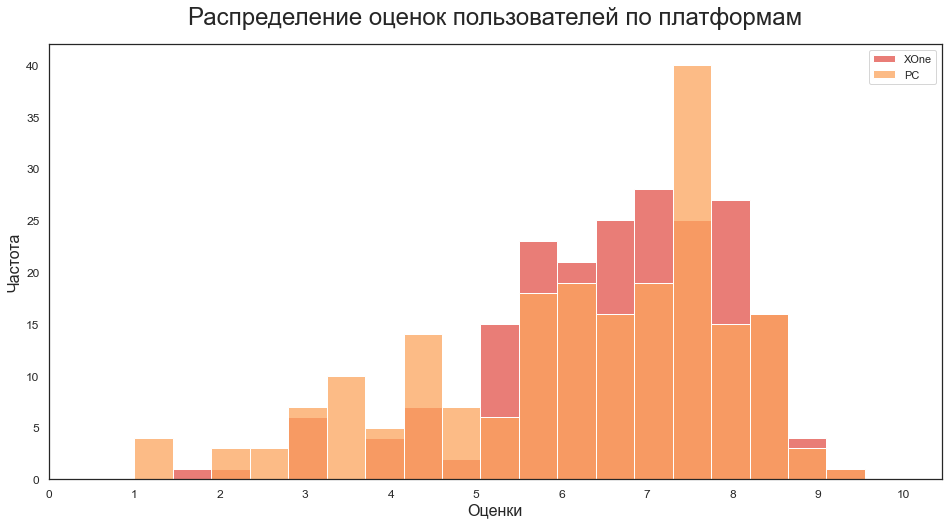

In [87]:
sns.histplot(XOne_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[0], label = 'XOne')
sns.histplot(PC_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[1], label = 'PC')

plt.xlabel('Оценки')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей по платформам', pad=20)
plt.legend()
plt.xticks(np.arange(0,11))

plt.show();

Значения для PC пропорционально увеличились, гистограммы скошены вправо. Теперь стоит проверить распределения на нормальность

In [88]:
results = st.shapiro(XOne_score)
print('p-значение XOne_score:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")   
    
print()

results = st.shapiro(PC_score)
print('p-значение PC_score:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")   
    

p-значение XOne_score: 2.12818827094452e-06
Отвергаем нулевую гипотезу, распределение не нормально

p-значение PC_score: 5.328774577151307e-08
Отвергаем нулевую гипотезу, распределение не нормально


Так как распределение не нормально, то оценить статистическую значимость различий в средних пользовательских рейтингах по парметрическим критериям нельзя, но можно применить U-критерий Манна-Уитни

In [89]:
results = st.mannwhitneyu(XOne_score, PC_score, alternative = 'two-sided')

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение: 0.059690143346073296
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Выборки по группам не имеют статистически значимого различия

## Гипотеза о разнице средних пользовательских рейтингов жанров

- H0: средние пользовательские рейтинги жанров Action и Sports не отличаются;
- H1: средние пользовательские рейтинги жанров Action и Sports отличаются


In [90]:
alpha = 0.05 # критический уровень статистической значимости для всех тестов

In [91]:
action_score = act_df.query('genre == "Action"')['user_score'].dropna()
sports_score = act_df.query('genre == "Sports"')['user_score'].dropna()

action_score.mean()
sports_score.mean()

len(action_score)
len(sports_score)

6.8600000000000065

5.190555555555556

460

180

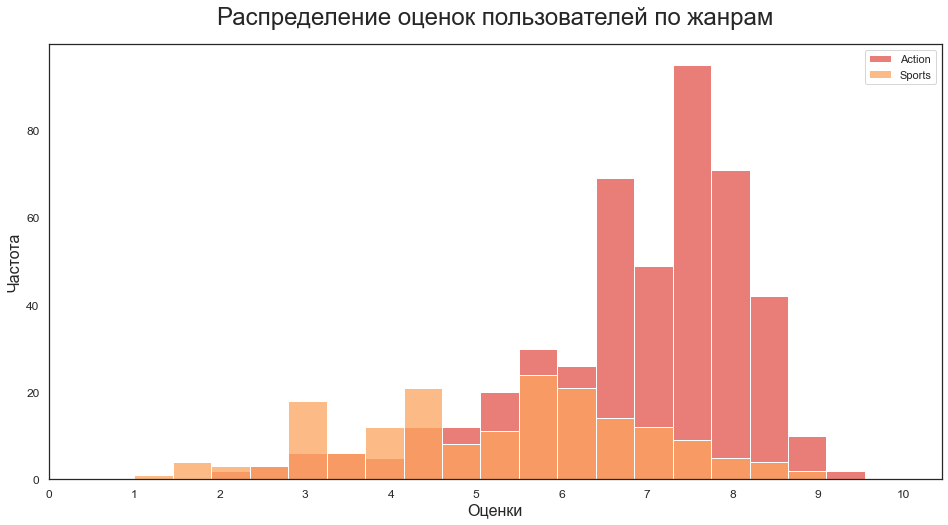

In [92]:
sns.histplot(action_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[0], label = 'Action')
sns.histplot(sports_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[1], label = 'Sports')

plt.xlabel('Оценки')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей по жанрам', pad=20)
plt.legend()
plt.xticks(np.arange(0,11))

plt.show();

In [93]:
sports_score = pd.concat([sports_score, sports_score.sample((len(action_score) - len(sports_score)), replace = True)])

print(len(sports_score))

460


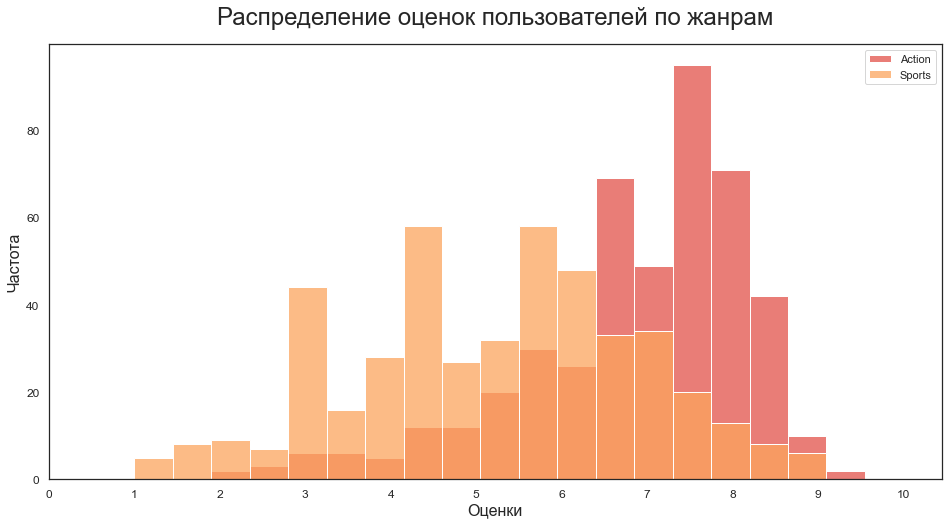

In [94]:
sns.histplot(action_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[0], label = 'Action')
sns.histplot(sports_score, bins = 20, binrange = (1, 10), color = sns.color_palette('Spectral')[1], label = 'Sports')

plt.xlabel('Оценки')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей по жанрам', pad=20)
plt.legend()
plt.xticks(np.arange(0,11))

plt.show();

In [95]:
results = st.shapiro(action_score)
print('p-значение action_score:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")   
    
print()

results = st.shapiro(sports_score)
print('p-значение sports_score:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")   
    

p-значение action_score: 1.777721409478277e-15
Отвергаем нулевую гипотезу, распределение не нормально

p-значение sports_score: 0.0005527311586774886
Отвергаем нулевую гипотезу, распределение не нормально


Снова распределения не нормальны

In [96]:
results = st.mannwhitneyu(action_score, sports_score, alternative = 'two-sided')

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение: 2.7259999361181476e-52
Отвергаем нулевую гипотезу: разница статистически значима


Выборки по группам имеют статистически значимое различие

Таким образом средние оценки пользователей на PC и Xbox One статистически не отличаются, а вот средние оценки между жанрами `Action` и `Sports` отличаются

# Вывод

Успех продаж и рекламной кампании зависят от каждого региона:
- В Америке и Европе наибольшей популярностью пользуются консоли PS4 и Xbox One, а также их предыдущие поколения
- В Японии самая популярная платформа - 3DS, затем PS3 и PS4, Xbox в Японии нет
- Так как PS4 и Xbox One самые новые платформы, то с 2013 года у них растут продажи, а у 3DS - падают, хотя она вышла ненамного раньше
- Оценки пользователей и критиков почти не влияют на продажи на всех платформах 
- В топ-5 жанров по продажам во всех регионах входят `Action`, `Shooter` и `Role-Playing`
- Наибольшее количество игр продаются с рейтингами `M` и `E` на западе, а в Японии с рейтингами `T` и либо это EC (дети от 3 лет), либо это AO (только для взрослых). Причем для этого рейтинга продаж больше, чем для всех остальных вместе взятых, а также продаж больше, чем у любой отдельной платформы и любого жанра
- Средние пользовательские рейтинги на Xbox One и PC не отличаются, а  рейтинги жанров `Action` и `Sports` отличаются